# In this notebook we will be doing a quality check and quality assurance

In [1]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)


In [2]:
import pandas as pd

covari_path = 'data/modified/data_clean_covari.csv'
#using pandas to read in as a df
covari = (pd.read_csv(covari_path,parse_dates=[0]))


#taking a peak at the data
covari.head(3)


,time,population,lat,lon,biomass,salin,temp,cruisename,SiO2,POSi,...,FeT,DOP,DON,DOFe,DOC,DIC,CDOM,ALK,par,hours_since_sunrise
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665,0.0193,14.832778
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665,0.0193,14.832778
2,2016-04-20 07:00:00,nanoeukaryotes (2-5µm),21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,-0.022845,-0.000127,...,0.000015,0.013734,0.248717,0.000017,1.648093,1697.874775,0.000034,1954.87665,0.0193,14.832778


In [3]:
covari.sort_values(by='lon')

,time,population,lat,lon,biomass,salin,temp,cruisename,SiO2,POSi,...,FeT,DOP,DON,DOFe,DOC,DIC,CDOM,ALK,par,hours_since_sunrise
5184,2017-09-25 11:00:00,picoeukaryotes (< 2µm),24.173696,-160.260388,0.408298,35.110375,27.715375,KM1713,-0.023453,-0.000130,...,0.000034,0.013152,0.249203,0.000017,1.578280,1691.816075,0.000030,1953.906825,1.523096,18.494167
5183,2017-09-25 11:00:00,nanoeukaryotes (2-5µm),24.173696,-160.260388,4.424203,35.110375,27.715375,KM1713,-0.023453,-0.000130,...,0.000034,0.013152,0.249203,0.000017,1.578280,1691.816075,0.000030,1953.906825,1.523096,18.494167
5182,2017-09-25 11:00:00,Synechococcus,24.173696,-160.260388,1.255523,35.110375,27.715375,KM1713,-0.023453,-0.000130,...,0.000034,0.013152,0.249203,0.000017,1.578280,1691.816075,0.000030,1953.906825,1.523096,18.494167
5181,2017-09-25 11:00:00,Prochlorococcus,24.173696,-160.260388,8.250892,35.110375,27.715375,KM1713,-0.023453,-0.000130,...,0.000034,0.013152,0.249203,0.000017,1.578280,1691.816075,0.000030,1953.906825,1.523096,18.494167
5180,2017-09-25 10:00:00,picoeukaryotes (< 2µm),24.172890,-160.260112,0.374465,35.112200,27.743225,KM1713,-0.023453,-0.000130,...,0.000034,0.013152,0.249203,0.000017,1.578280,1691.816075,0.000030,1953.906825,1.760299,17.494167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,2021-12-29 23:00:00,picoeukaryotes (< 2µm),32.643083,-117.531917,3.572489,33.471363,15.314338,TN398,0.363296,0.099231,...,0.000497,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,568.868550,8.146111
11115,2021-12-29 22:00:00,Prochlorococcus,32.640186,-117.520431,0.556398,33.461781,15.104845,TN398,0.363296,0.099231,...,0.000497,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1117.570500,7.147222
11116,2021-12-29 22:00:00,Synechococcus,32.640186,-117.520431,10.638536,33.461781,15.104845,TN398,0.363296,0.099231,...,0.000497,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1117.570500,7.147222
11117,2021-12-29 22:00:00,nanoeukaryotes (2-5µm),32.640186,-117.520431,1.910670,33.461781,15.104845,TN398,0.363296,0.099231,...,0.000497,0.164132,2.736920,0.000178,19.695796,1819.587625,0.000756,2008.417775,1117.570500,7.147222


## looking for relationshiops between all variables

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

corr_matrix = covari[covari.columns.difference(['time', 'cruisename', 'population', 'SizeClass', 'lat', 'lon'])]
# Calculate and annotate p-values
p_values = np.zeros_like(corr_matrix)
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr, p_value = pearsonr(corr_matrix[corr_matrix.columns[i]], corr_matrix[corr_matrix.columns[j]])
        p_values[i, j] = p_value
        p_values[j, i] = p_value


In [5]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues
covari_floats = covari[covari.columns.difference(['biomass','time', 'cruisename', 'population', 'SizeClass', 'lat', 'lon', 'par','salin'])]
calculate_pvalues(covari_floats)[:20] 


,ALK,CDOM,DIC,DOC,DOFe,DON,DOP,FeT,NH4,NO2,...,O2,PIC,PO4,POC,POFe,PON,POSi,SiO2,hours_since_sunrise,temp
ALK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8914,0.0
CDOM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5517,0.0
DIC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4125,0.0
DOC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181,0.0
DOFe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0986,0.0
DON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1358,0.0
DOP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181,0.0
FeT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7986,0.0
NH4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3171,0.0
NO2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058,0.0


In [6]:
covari_floats.dtypes

ALK                    float64
CDOM                   float64
DIC                    float64
DOC                    float64
DOFe                   float64
DON                    float64
DOP                    float64
FeT                    float64
NH4                    float64
NO2                    float64
NO3                    float64
O2                     float64
PIC                    float64
PO4                    float64
POC                    float64
POFe                   float64
PON                    float64
POSi                   float64
SiO2                   float64
hours_since_sunrise    float64
temp                   float64
dtype: object

In [7]:
def heat_map_correlation(df=covari):
    """
    This function takes a dataframe and makes a correlation hatmap of all the variables.
    The results allows us to determine which varaibles are most correlated with eachother.
    And if two or more variables are HIGHLY correlated we will remove them from the dataframe as it would
    be redundant in the random forest models to include them.
    """
    import seaborn as sns
    covari_floats = covari[covari.columns.difference(['time', 'cruisename', 'PopulationName', 'SizeClass', 'lat', 'lon','population'])]


    corr = sns.heatmap(covari_floats.corr().abs(),
                    xticklabels=covari_floats.columns,
                    yticklabels=covari_floats.columns)
    
    plt.xticks(rotation=45, ha='right') #roating the xticks to make it easier to read
    plt.show()
    return

    

### Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interaction

BAKER - I got an error when running heat_map_correlation() 'ValueError', and I fixed it by adding 'population' to the exclusions in the above cell

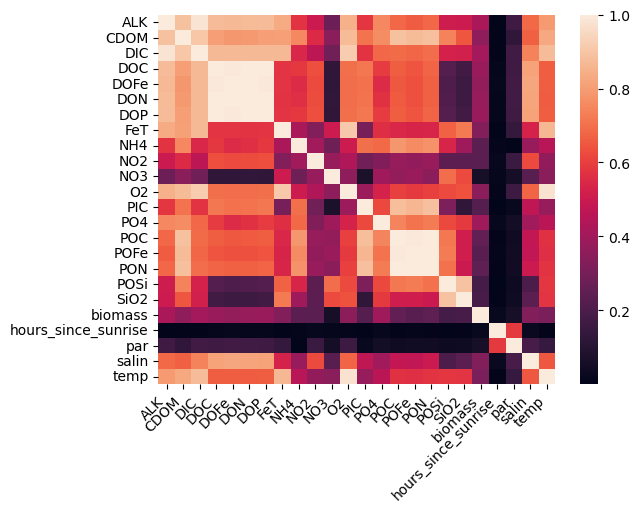

In [8]:
heat_map_correlation()

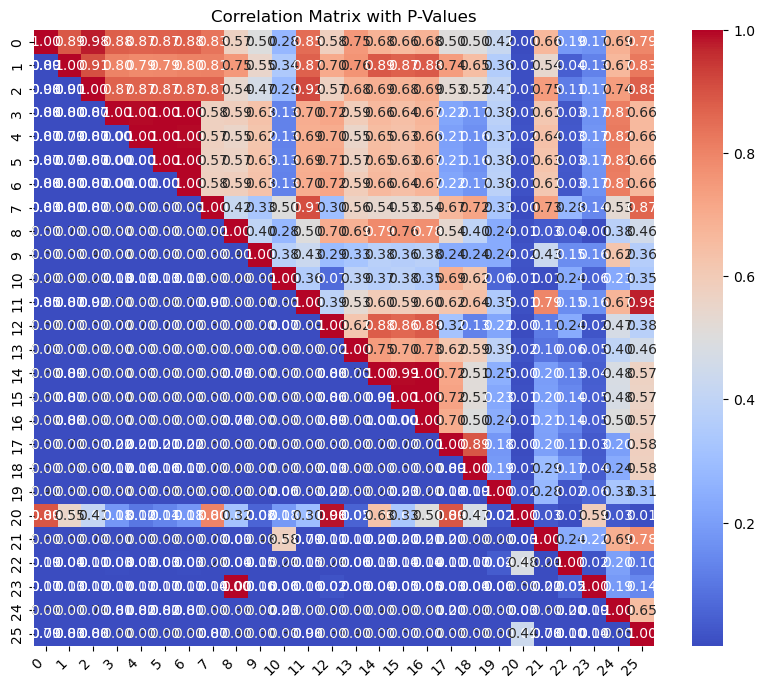

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

covari_floats = covari[covari.columns.difference(['time', 'cruisename', 'PopulationName', 'SizeClass', 'population'])]

# Calculate the correlation matrix
corr_matrix = covari_floats.corr().abs()

# Calculate p-values for each pair of variables
num_vars = len(covari_floats.columns)
p_values = np.zeros((num_vars, num_vars))
for i in range(num_vars):
    for j in range(i + 1, num_vars):
        corr, p_value = pearsonr(covari_floats[covari_floats.columns[i]], covari_floats[covari_floats.columns[j]])
        p_values[i, j] = p_value
        p_values[j, i] = p_value

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Annotate p-values on the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(p_values, ax=ax, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=False)

# Customize plot
plt.title("Correlation Matrix with P-Values")
plt.xticks(rotation=45, ha='right')
plt.show()

# Save the plot to a file if needed
# plt.savefig("/figures/validation/correlation_plot.png")


BAKER - I got an error in the above cell 'ValueError: could not convert string to float: 'Prochlorococcus'', I fixed it by adding population to the list of exceptions

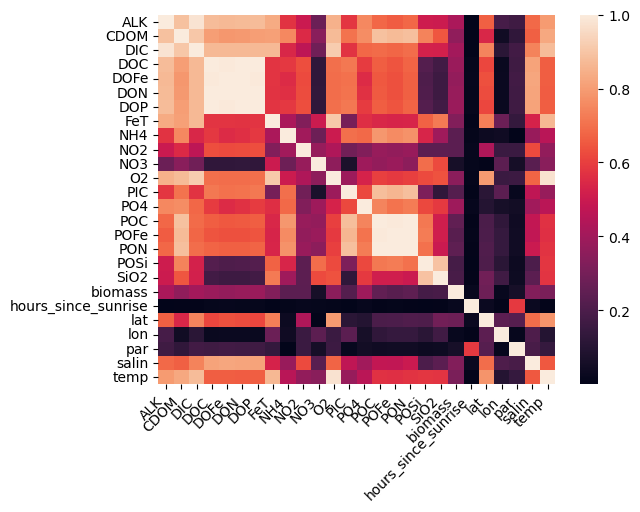

In [10]:
import seaborn as sns
covari_floats = covari[covari.columns.difference(['time', 'cruisename', 'PopulationName', 'SizeClass', 'population'])]


corr = sns.heatmap(covari_floats.corr().abs(),
                xticklabels=covari_floats.columns,
                yticklabels=covari_floats.columns)
plt.xticks(rotation=45, ha='right') #roating the xticks to make it easier to read
plt.show()

#corr.figure.savefig("/figures/validation/correlation_plot.png")


BAKER - same error above, same fix

## What variables are most related? 

### Dropping DOP, DOFe, DON, POFe, POSi, PON as they are the most correlated features.

In [11]:
covari_corr = covari_floats.corr().abs().unstack()
covari_corr = covari_corr.sort_values(kind="quicksort")

print(covari_corr[covari_corr.between(0.80, 0.9999)])

#covari.drop(['DOP', 'DOFe', 'DON', 'POFe', 'POSi', 'PON'], axis=1, inplace=True)

DOC   CDOM    0.803241
CDOM  DOC     0.803241
DOP   CDOM    0.803241
CDOM  DOP     0.803241
FeT   CDOM    0.805193
                ...   
DOP   DON     0.998820
DON   DOC     0.998820
DOC   DON     0.998820
DON   DOFe    0.999018
DOFe  DON     0.999018
Length: 86, dtype: float64




## Saving machine learning ready dataset

In [12]:
covari.to_csv('data/modified/RF_ready_covari.csv', index=False)